<a href="https://colab.research.google.com/github/joaquinvvelaco/diplo-datos-2022/blob/main/eyc/entregables/Grupo_29_Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk')

#from decouple import config
from sqlalchemy import create_engine, text

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [ ]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [ ]:
# Ejercicio 1.1: creamos una SQLite DB usando SQL Alchemy
engine = create_engine('sqlite:///db.sqlite3', echo=True)

In [ ]:
# Abrimos el dataset de Airbnb de precios por código postal
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]

airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce', downcast='unsigned')

airbnb_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105.0,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057.0,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182.0,-37.859755,144.977369,159,1253.0,4452.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071.0,-37.758971,144.989228,50,250.0,920.0
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183.0,-37.864530,144.992238,69,400.0,1900.0


In [ ]:
# Ingestamos los datasets en tablas

melb_df.to_sql('property_sales_prices', con=engine, if_exists="replace")

airbnb_df.to_sql('airbnb_property_prices', con=engine, if_exists="replace")

2022-06-28 18:02:55,764 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("property_sales_prices")
2022-06-28 18:02:55,772 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-28 18:02:55,774 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("property_sales_prices")
2022-06-28 18:02:55,778 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-28 18:02:55,786 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-06-28 18:02:55,796 INFO sqlalchemy.engine.Engine 
CREATE TABLE property_sales_prices (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-06-28 18:02:55,798 INFO sqlalchemy.engine.Engine [no key 0.00249s] (

In [ ]:
#Implementar consultas en SQL que respondan con la siguiente información:
#cantidad de registros totales por ciudad.
#cantidad de registros totales por barrio y ciudad.

# Armamos las consultas

query_melb_city = """
SELECT 'Melbourne' AS 'city', NULL AS 'suburb', COUNT(*) AS 'count'
FROM property_sales_prices
ORDER BY count DESC
"""
query_melb_suburbs = """
SELECT 'Melbourne' AS 'city', suburb AS 'suburb', COUNT(*) AS 'count'
FROM property_sales_prices
GROUP BY suburb
ORDER BY count DESC
"""
query_airbnb_city = """
SELECT city AS 'city', NULL AS 'suburb', COUNT(*) AS 'count'
FROM airbnb_property_prices
GROUP BY city
ORDER BY count DESC
"""

query_airbnb_suburbs = """
SELECT city AS 'city', suburb AS 'suburb', COUNT(*) AS 'count'
FROM airbnb_property_prices
GROUP BY city, suburb
ORDER BY count DESC
"""

queries = [
    {'description': 'Registros totales por ciudad (Melbourne data)',
     'query': query_melb_city}, 
    {'description': 'Registros totales por ciudad y barrio (Melbourne data)',
     'query':query_melb_suburbs},
    {'description': 'Registros totales por ciudad (Airbnb data)',
     'query':query_airbnb_city},
    {'description': 'Registros totales por ciudad y barrio (Airbnb data)',
     'query':query_airbnb_suburbs},
]

In [ ]:
# Ejecutamos las consultas
with engine.connect() as connection:
    for item in queries:
        result = connection.execute(item['query'])
        print(f"\n{item['description']}\n")
        for row in result:
            suburb = "" if row['suburb'] is None else f" - {row['suburb']}"
            print(f"{row['city']}{suburb}: {row['count']}")
        print("\n")
        

2022-06-28 18:03:00,401 INFO sqlalchemy.engine.Engine 
SELECT 'Melbourne' AS 'city', NULL AS 'suburb', COUNT(*) AS 'count'
FROM property_sales_prices
ORDER BY count DESC

2022-06-28 18:03:00,409 INFO sqlalchemy.engine.Engine [raw sql] ()

Registros totales por ciudad (Melbourne data)

Melbourne: 13580


2022-06-28 18:03:00,419 INFO sqlalchemy.engine.Engine 
SELECT 'Melbourne' AS 'city', suburb AS 'suburb', COUNT(*) AS 'count'
FROM property_sales_prices
GROUP BY suburb
ORDER BY count DESC

2022-06-28 18:03:00,428 INFO sqlalchemy.engine.Engine [raw sql] ()

Registros totales por ciudad y barrio (Melbourne data)

Melbourne - Reservoir: 359
Melbourne - Richmond: 260
Melbourne - Bentleigh East: 249
Melbourne - Preston: 239
Melbourne - Brunswick: 222
Melbourne - Essendon: 220
Melbourne - South Yarra: 202
Melbourne - Glen Iris: 195
Melbourne - Hawthorn: 191
Melbourne - Coburg: 190
Melbourne - Northcote: 188
Melbourne - Brighton: 186
Melbourne - Kew: 177
Melbourne - Balwyn North: 171
Melbourne

In [ ]:
#Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL
#para obtener un resultado similar a lo realizado con Pandas en clase.

query = """
SELECT *

FROM property_sales_prices AS P 

LEFT OUTER JOIN 
(
    SELECT  zipcode AS zipcode,
            AVG(price) AS airbnb_price_mean, 
            COUNT(zipcode) AS airbnb_record_count,
            AVG(weekly_price) AS airbnb_weekly_price_mean, 
            AVG(monthly_price) AS airbnb_monthly_price_mean
    FROM airbnb_property_prices
    GROUP BY zipcode
    HAVING zipcode NOT NULL
) AS A ON P.postcode = A.zipcode

"""

with engine.connect() as connection:
    result = connection.execute(query)
    for row in result:
        print(row)

Streaming output truncated to the last 5000 lines.
(6383, 'Toorak', '11/38 Grange Rd', 3, 'u', 950000.0, 'S', 'hockingstuart', '18/03/2017', 4.6, 3142.0, 3.0, 1.0, 1.0, 57.0, 107.0, 1960.0, 'Stonnington', -37.8371, 145.012, 'Southern Metropolitan', 7217.0, 3142.0, 244.5, 118, 1168.8235294117646, 4471.833333333333)
(6384, 'Toorak', '22/530 Toorak Rd', 2, 'u', 531000.0, 'S', 'Morleys', '18/03/2017', 4.6, 3142.0, 2.0, 1.0, 1.0, 0.0, None, None, 'Stonnington', -37.8424, 145.0184, 'Southern Metropolitan', 7217.0, 3142.0, 244.5, 118, 1168.8235294117646, 4471.833333333333)
(6385, 'Toorak', '3/765 Malvern Rd', 2, 'u', 575000.0, 'S', 'Luxe', '18/06/2016', 4.6, 3142.0, 2.0, 1.0, 1.0, 0.0, None, 2008.0, 'Stonnington', -37.8498, 145.0173, 'Southern Metropolitan', 7217.0, 3142.0, 244.5, 118, 1168.8235294117646, 4471.833333333333)
(6386, 'Toorak', '17/34 Mathoura Rd', 1, 'u', 366000.0, 'S', 'Jellis', '18/06/2016', 4.6, 3142.0, 1.0, 1.0, 1.0, 0.0, 35.0, 1967.0, 'Stonnington', -37.8464, 145.0074, 'Sou

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### Ejercicio 2.1

In [ ]:
melb_df.columns###Listamos las columnas

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Seleccionamos un conjunto de columnas que nos parecen interesantes para predecir el valor de las propiedades:

In [ ]:
interesting_cols=['Price', 'Landsize', 'BuildingArea', 'Suburb', 'Lattitude', 'Longtitude','YearBuilt']

Nos parece interesante seleccionar estas columnas ya que consideramos que todas pueden ser importantes a la hora de predecir el valor de una propiedad: aquellas variables relacionadas al tamaño del terreno, el tamaño de la construcción, como así también al año de construcción. Por otro lado, también es importante seleccionar variables que tengan que ver con la ubicación de las propiedades, como el barrio y la Latitud y la Longitud. El resto de las variables que no fueron seleccionadas consideramos que otorgan información que de alguna manera está contenida en las variables que han sido seleccionadas.

Eliminamos los valores extremos de las variables Precio y área del terreno. La variables `BuildingArea` (área de la construcción) y `YearBuilt` (año de construcción) cuentan con valores faltantes por lo que se difiere su análisis al segundo entregable donde se imputarán los mismos.

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
price='Price'
landsize='Landsize'

In [ ]:
data = remove_outlier(melb_df, price)[price]
data1 = remove_outlier(melb_df, landsize)[landsize]

Gráfico de las variables luego de la eliminación de los valores extremos:

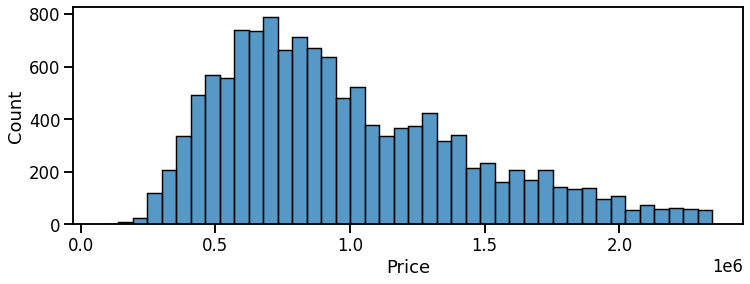

In [ ]:
fig = plt.figure(figsize=(12, 4))
seaborn.histplot(x=data)

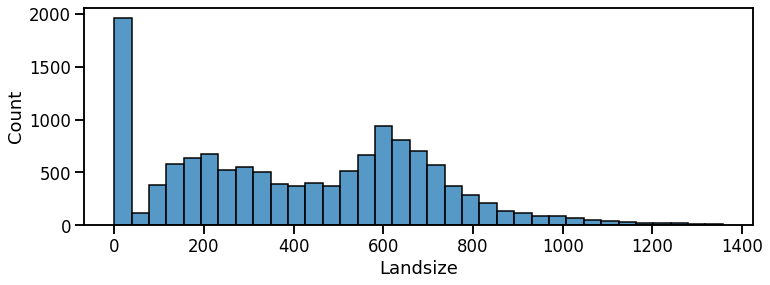

In [ ]:
fig = plt.figure(figsize=(12, 4))
seaborn.histplot(x=data1)

### Ejercicio 2.2

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22895 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22895 non-null  object 
 5   suburb                 22872 non-null  object 
 6   state                  22834 non-null  object 
 7   zipcode                22749 non-null  float64
 8   latitude               22895 non-null  float64
 9   longitude              22895 non-null  float64
 10  price                  22895 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 2.3+ MB


Generamos un dataframe con información agrupada por zipcode

In [ ]:
def get_grouped_df(airbnb_df):
  grouped = airbnb_df.groupby('zipcode').agg( # Agrupo por zipcode
    zipcode = ('zipcode','first'),   
    count_zipcode = ('zipcode','count'), 
    min_price = ('price', 'min'),
    max_price = ('price', 'max'),
    mean_price = ('price', 'mean'),
    median_price = ('price', 'median')
  )
  grouped.reset_index(drop = True, inplace = True)
  return grouped

grouped_airbnb_df = get_grouped_df(airbnb_df)
print(grouped_airbnb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zipcode        247 non-null    float64
 1   count_zipcode  247 non-null    int64  
 2   min_price      247 non-null    int64  
 3   max_price      247 non-null    int64  
 4   mean_price     247 non-null    float64
 5   median_price   247 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 11.7 KB
None


Filtramos el dataframe agrupado por aquellos registros cuyo count_zipcode (recuento de observaciones por zipcode) sea mayor a 4.

In [ ]:
grouped_airbnb_df = grouped_airbnb_df[grouped_airbnb_df.count_zipcode>4]

Unimos los dataframes con el método `merge`

In [ ]:
melb_df.merge(grouped_airbnb_df, left_on='Postcode', right_on='zipcode')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,zipcode,count_zipcode,min_price,max_price,mean_price,median_price
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,-37.79960,144.99840,Northern Metropolitan,4019.0,3067.0,258,28,900,130.624031,100.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,-37.80790,144.99340,Northern Metropolitan,4019.0,3067.0,258,28,900,130.624031,100.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,-37.80930,144.99440,Northern Metropolitan,4019.0,3067.0,258,28,900,130.624031,100.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,-37.79690,144.99690,Northern Metropolitan,4019.0,3067.0,258,28,900,130.624031,100.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,-37.80720,144.99410,Northern Metropolitan,4019.0,3067.0,258,28,900,130.624031,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13384,Officer,24 Henrietta Av,4,h,559000.0,SP,Ray,15/07/2017,43.3,3809.0,...,-38.07054,145.42554,Eastern Victoria,2768.0,3809.0,14,35,190,76.214286,64.5
13385,Yarra Glen,15 Yarra St,3,h,620000.0,SP,Buckingham,22/07/2017,31.4,3775.0,...,-37.65391,145.37389,Northern Victoria,1160.0,3775.0,45,75,1501,337.688889,220.0
13386,Emerald,35 Kings Rd,2,h,655000.0,S,Kaye,29/07/2017,36.9,3782.0,...,-37.93064,145.44530,Eastern Victoria,2259.0,3782.0,46,66,350,188.586957,190.0
13387,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,-37.51232,145.13282,Northern Victoria,2170.0,3757.0,7,100,820,245.000000,130.0


En relación a la última pregunta, consideramos que para unir los conjuntos de datos podrían utilizarse las columnas `suburb` o `CouncilArea`, dado que ambas hacen referencia a la localización geográfica y se encuentran en ambos dataframes. Por otro lado, al igual que la columna zipcode, estas variables no son tan granulares como las de geolocalización (`Lattitude` y `Longitude`).

In [ ]:
# C. inferir missing zipcode en base a suburbio/barrio

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
from google.colab import files

melb_df.to_csv("melb_data_extended.csv", index=None)
files.download('melb_data_extended.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)